In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import gdown

## Preprocessing

In [ ]:
!gdown --id 1o5q4R7U67sa9ltjjLd7cOxWrAVoVRVFR

Downloading...
From: https://drive.google.com/uc?id=1o5q4R7U67sa9ltjjLd7cOxWrAVoVRVFR
To: /content/kendaraan_train.csv
100% 15.2M/15.2M [00:00<00:00, 41.7MB/s]


In [ ]:
df = pd.read_csv('kendaraan_train.csv')

In [ ]:
df

In [ ]:
df.info()

In [ ]:
print(df.duplicated().sum())
print(df.isna().sum().sum())

0
142916


In [ ]:
df.isna().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [ ]:
df1 = df.dropna(subset = ['Jenis_Kelamin', 'SIM', 'Kode_Daerah', 'Sudah_Asuransi', 'Kendaraan_Rusak', 'Kanal_Penjualan'])
df1.isna().sum()

id                       0
Jenis_Kelamin            0
Umur                 10433
SIM                      0
Kode_Daerah              0
Sudah_Asuransi           0
Umur_Kendaraan       10491
Kendaraan_Rusak          0
Premi                10785
Kanal_Penjualan          0
Lama_Berlangganan    10255
Tertarik                 0
dtype: int64

In [ ]:
df1

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
5,6,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0,0
6,7,Wanita,33.0,1.0,8.0,0.0,NaN,Pernah,32435.0,124.0,215.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [ ]:
labelencoder = LabelEncoder()
df1['Umur_Kendaraan'] = labelencoder.fit_transform(df1['Umur_Kendaraan'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df1.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,209929.000000,199496.000000,209929.000000,209929.000000,209929.000000,209929.000000,199144.000000,209929.000000,199674.000000,209929.000000
mean,142986.942004,38.830277,0.997852,26.401750,0.459465,0.641788,30504.896597,112.183510,154.277152,0.122056
std,82485.405094,15.537280,0.046301,13.248741,0.498355,0.780725,17121.859687,54.142769,83.793190,0.327351
min,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71557.000000,25.000000,1.000000,15.000000,0.000000,0.000000,24370.750000,29.000000,81.000000,0.000000
50%,143114.000000,36.000000,1.000000,28.000000,0.000000,1.000000,31618.000000,139.000000,154.000000,0.000000
75%,214345.000000,49.000000,1.000000,35.000000,1.000000,1.000000,39333.250000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,3.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
df1.fillna(df1.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
df1.isna().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [ ]:
df1['Jenis_Kelamin'] = labelencoder.fit_transform(df1['Jenis_Kelamin'])
df1['Kendaraan_Rusak'] = labelencoder.fit_transform(df1['Kendaraan_Rusak'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


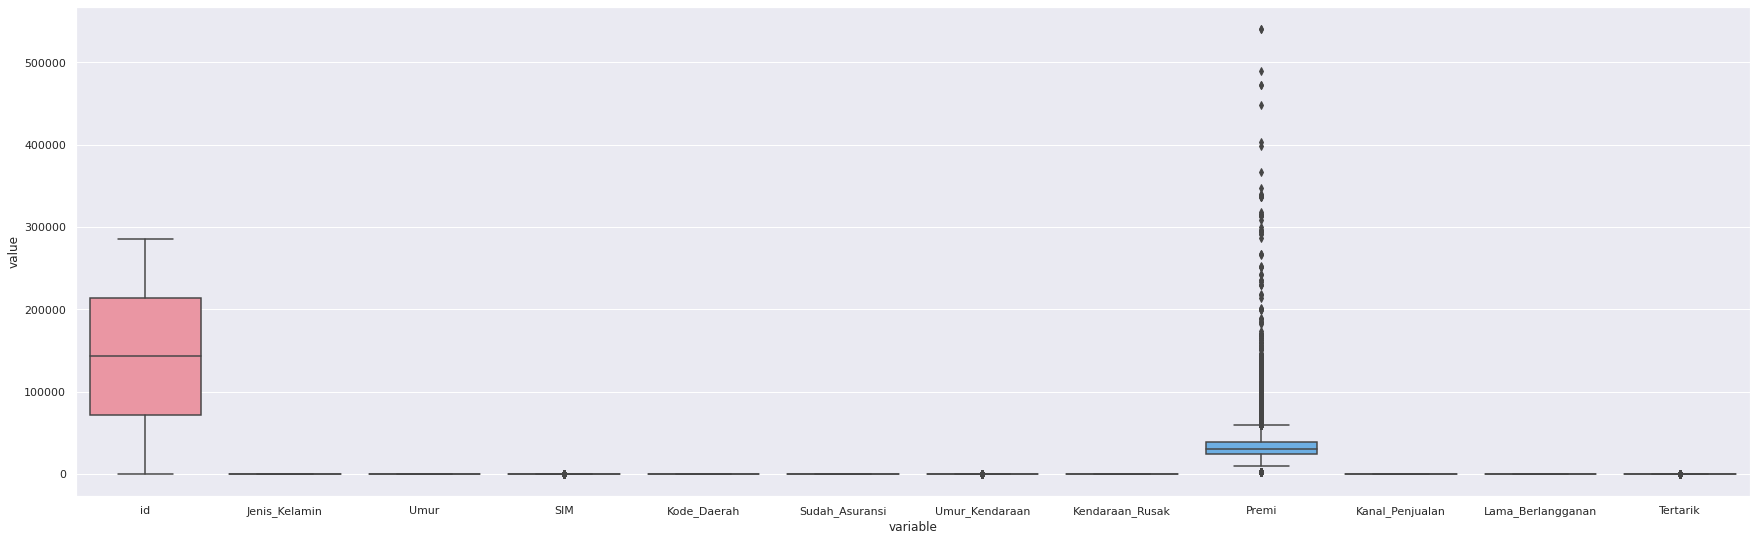

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(30,9)})
sns.boxplot(x="variable", y="value", data=pd.melt(df1))

plt.show()

In [ ]:
from scipy import stats
z = np.abs(stats.zscore(df1))
print(z)

[[1.73347373 1.08522316 0.58300134 ... 0.73539987 0.70088899 0.37285953]
 [1.7334616  0.92146946 0.60541255 ... 1.53637706 0.04555575 0.37285953]
 [1.73343736 1.08522316 1.26564249 ... 0.2182474  1.11694015 0.37285953]
 ...
 [1.73172937 1.08522316 1.0451623  ... 0.73539987 0.87765807 0.37285953]
 [1.73174149 0.92146946 1.92587242 ... 0.2182474  1.41607722 0.37285953]
 [1.73175361 0.92146946 0.40734356 ... 1.59178626 1.34943933 0.37285953]]


In [ ]:
threshold = 3
print(np.where(z > 3))

In [ ]:
df2 = df1[(z < 3).all(axis=1)]

In [ ]:
print(df1.shape)
print(df2.shape)

(209929, 12)
(197896, 12)


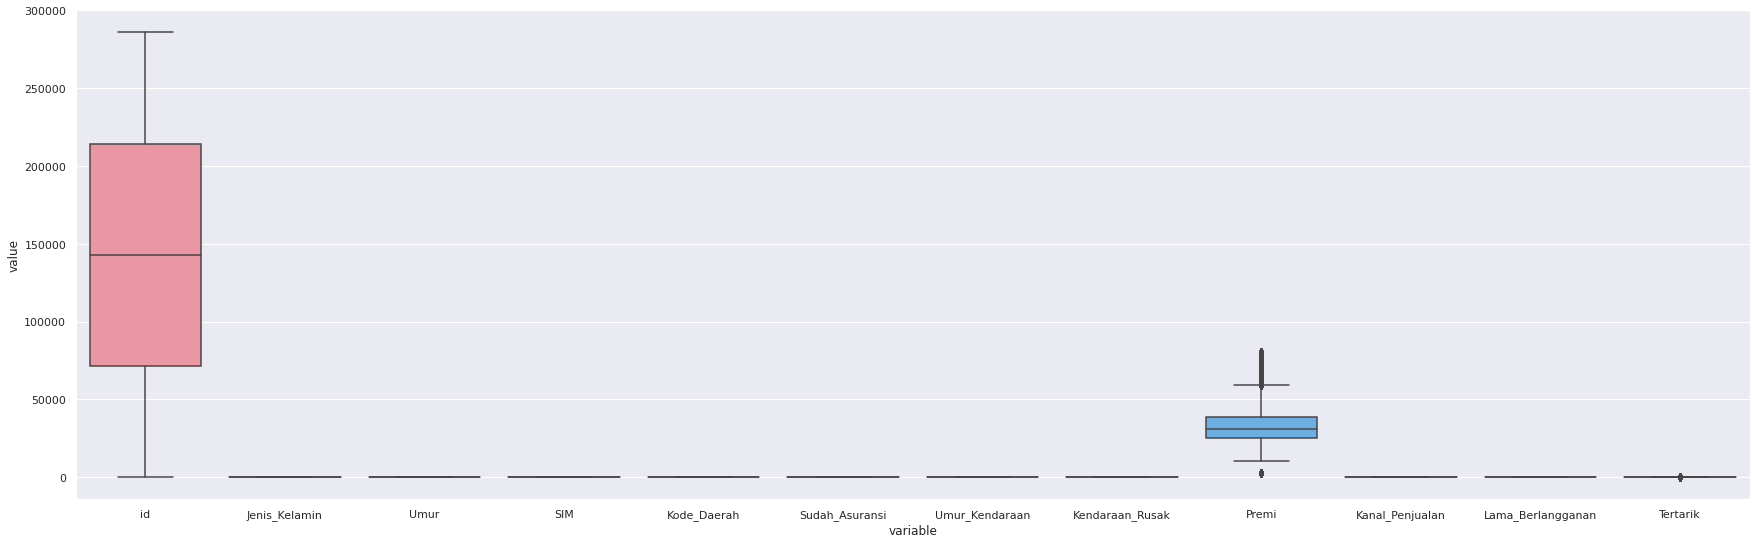

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(30,9)})
sns.boxplot(x="variable", y="value", data=pd.melt(df2))

plt.show()

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,15)})
def heatmap(data):
  sns.heatmap(data.corr(), vmax=1, annot=True, cmap='Pastel1')

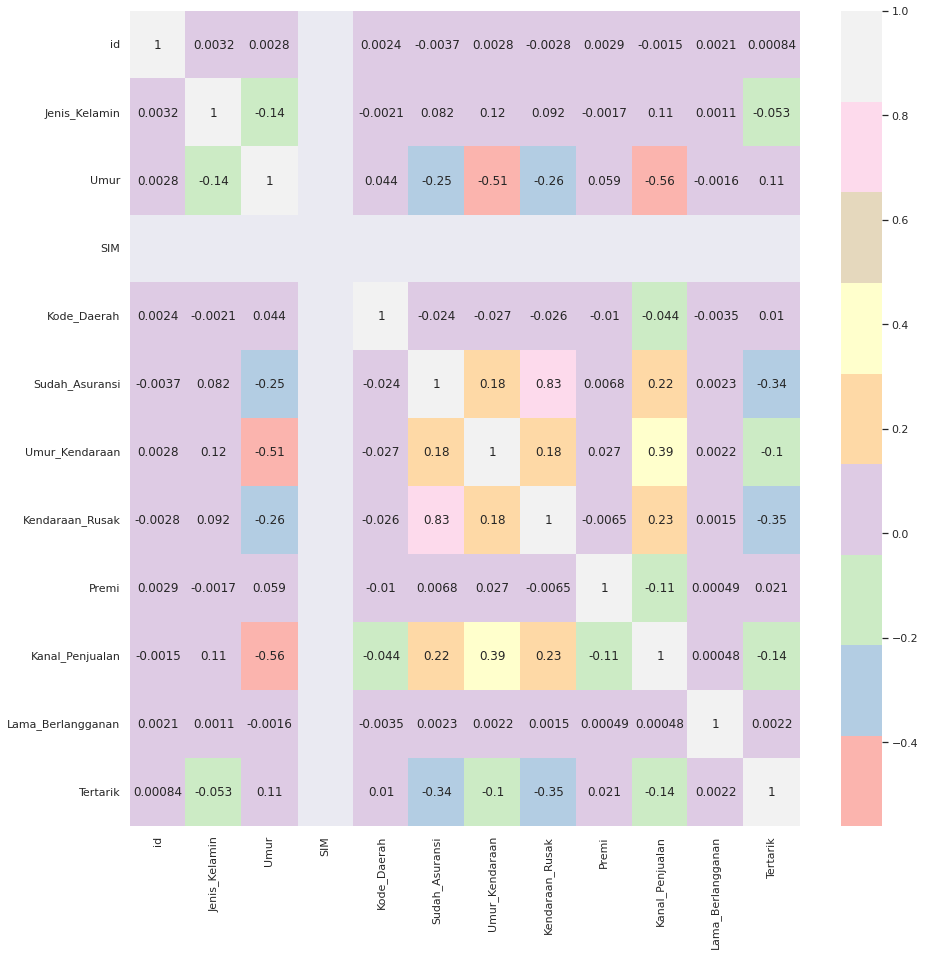

In [ ]:
heatmap(df2)

In [ ]:
#df2 = df2.drop(['Tertarik'], axis=1)
df3 = df2[['Umur','Lama_Berlangganan']]
df3

,Umur,Lama_Berlangganan
0,30.0,97.0
1,48.0,158.0
3,58.0,63.0
5,21.0,171.0
8,20.0,31.0
...,...,...
285826,23.0,217.0
285827,21.0,50.0
285828,23.0,226.0
285829,68.0,270.0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
dfn = sc_X.fit_transform(df3)

In [ ]:
dfn.shape

(197896, 2)

## K-Means Clustering

In [ ]:
np.random.seed(42)

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [ ]:
class KMeans:
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list indeks sampel untuk setiap cluster
        self.clusters = [[] for _ in range(self.K)]
        # pusat (vektor fitur rata-rata) untuk setiap cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialize
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            # Tetapkan sampel ke centroid terdekat (buat cluster)
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            # periksa apakah cluster telah berubah
            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # Klasifikasikan sampel sebagai indeks cluster-nya
        return self._get_cluster_labels(self.clusters)

    def _get_cluster_labels(self, clusters):
        # setiap sampel akan mendapatkan label dari cluster yang ditugaskan
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Tetapkan sampel ke centroid terdekat untuk membuat cluster
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # jarak sampel saat ini ke setiap centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # tetapkan nilai rata-rata cluster ke centroid
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # jarak antara setiap centroid lama dan baru, untuk semua centroid
        distances = [
            euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)
        ]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()

In [ ]:
from scipy.spatial.distance import cdist
distortions = []

for i in range(1,11):
    k = KMeans(K=i, max_iters=150, plot_steps=False)
    y_pred = k.predict(dfn)
    print(k.centroids)
    distortions.append(sum(np.min(cdist(dfn, k.centroids), axis=1)) / dfn.shape[0])
# k.plot()

[[ 1.33051334e-16 -1.54482886e-16]]
[[ 1.05684604 -0.00228703]
 [-0.67315986  0.00145673]]
[[-0.45388768  0.97494996]
 [-0.50334377 -0.82050047]
 [ 1.34132366 -0.0327555 ]]
[[ 0.72834697 -0.85350408]
 [-0.83808954 -0.74242455]
 [ 1.27380465  0.76287438]
 [-0.58808734  0.95684014]]
[[-0.60407309 -1.19997953]
 [ 1.17847595 -0.76669262]
 [ 1.11225073  0.9430946 ]
 [-0.59024428 -0.00350341]
 [-0.65170928  1.19467439]]
[[-0.71022751  0.01047122]
 [ 0.56674768  1.01742243]
 [-0.85770591 -1.18150057]
 [ 0.5560415  -0.92262389]
 [ 1.88855414 -0.01066046]
 [-0.86307914  1.19180678]]
[[-0.89453814 -1.16665109]
 [ 0.33945702  0.16781375]
 [ 1.25320073  1.15547458]
 [-0.65446791  1.24934122]
 [ 0.38133564 -1.1555661 ]
 [ 1.80401246 -0.61916292]
 [-0.90238083  0.04278934]]
[[ 1.77359824 -0.76982008]
 [ 0.33341084  1.19420226]
 [-0.89732859 -0.00344469]
 [-0.89414915 -1.18442856]
 [ 1.73499784  0.93448134]
 [-0.89557859  1.18691837]
 [ 0.35903715 -1.20350575]
 [ 0.37229271 -0.00348085]]
[[ 0.3476080

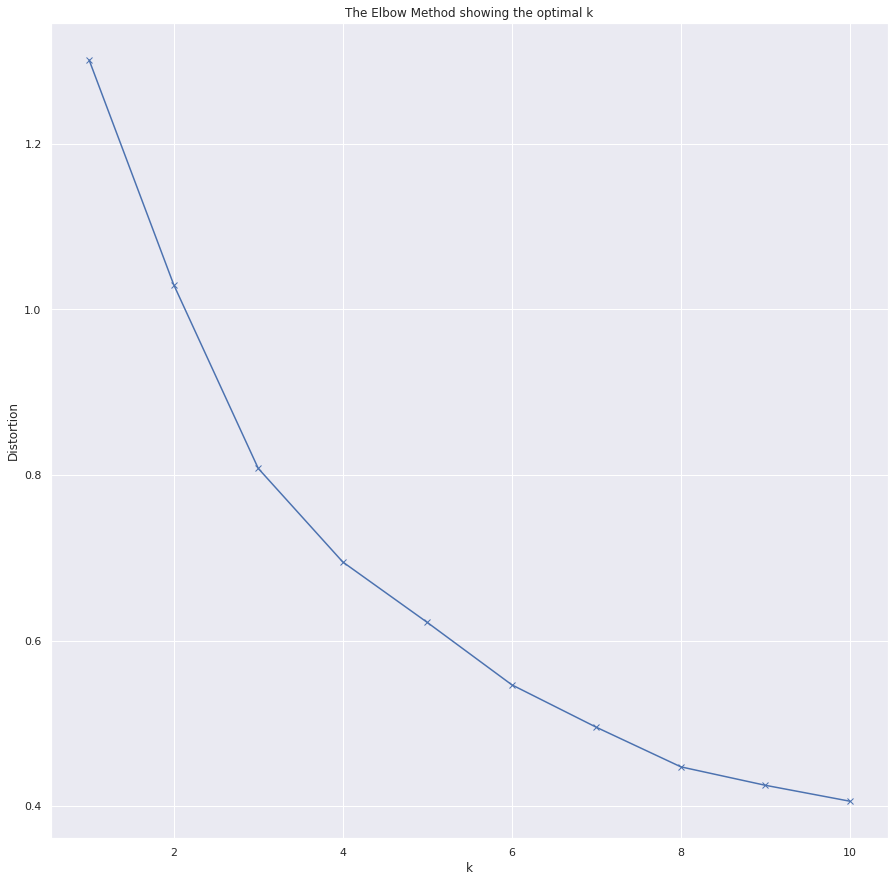

In [ ]:
K = range(1,11)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


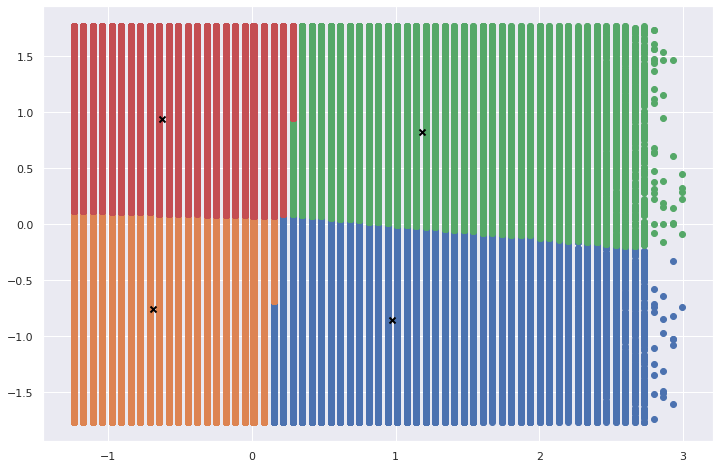

In [ ]:
k = KMeans(K=4, max_iters=150, plot_steps=False)
y_pred = k.predict(dfn)
k.plot()